In [2]:
# Imports
import pandas as pd

# Convert the csv file to a dataframe
movies = pd.read_csv('movies.csv')

# Show the first few lines
movies.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [3]:
# Check data types of the dataframe
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [4]:
# Check null value count
movies.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

In [5]:
# Rename dataframe columns
movies = movies.rename({'MOVIES': 'title', 'YEAR':'year', 'GENRE':'genre', 'RATING':'rating', 'ONE-LINE':'description', 'STARS':'cast', 'VOTES':'votes', 'RunTime':'runtime', 'Gross':'gross'}, axis=1)

In [6]:
# Check if the columns are renamed
movies.columns.to_list()

['title',
 'year',
 'genre',
 'rating',
 'description',
 'cast',
 'votes',
 'runtime',
 'gross']

In [7]:
# Remove newline characters
movies = movies.map(lambda x: x.strip().replace('\n', '') if isinstance(x, str) else x)

In [8]:
# Extract start_year and end_year
movies[['start_year', 'end_year']] = movies['year'].str.extract(r'\((\d{4})[– ]*(\d{4})?\)')

# Fill NaN in end_year with 'Ongoing' if missing
movies['end_year'] = movies['end_year'].fillna('N/A')

In [9]:
# Create new type column based on existence of start and end dates
movies['type'] = movies['end_year'].apply(lambda x: 'movie' if x == 'N/A' else 'series')

In [10]:
# Drop year column
movies = movies.drop('year', axis=1)

In [11]:
# Convert rating to float
movies['rating'] = pd.to_numeric(movies['rating'], errors='coerce')

# Convert 'votes' to string before replacing commas
movies['votes'] = movies['votes'].astype(str).str.replace(',', '', regex=True)

# Convert to integer (handling NaN values properly)
movies['votes'] = pd.to_numeric(movies['votes'], errors='coerce').astype('Int64')

# Convert runtime to integer (assuming it's in minutes)
movies['runtime'] = pd.to_numeric(movies['runtime'], errors='coerce').astype('Int64')

# Convert start_year and end_year to datetime (assuming only year is given)
movies['start_year'] = pd.to_datetime(movies['start_year'], format='%Y', errors='coerce')
movies['end_year'] = pd.to_datetime(movies['end_year'], format='%Y', errors='coerce')


In [12]:
# Split the genre column into three separate columns
genre_split = movies['genre'].str.split(', ', expand=True)

# Assign new columns to the dataframe
movies[['genre1', 'genre2', 'genre3']] = genre_split.iloc[:, :3]

# Drop the original 'genre' column if no longer needed
movies.drop(columns=['genre'], inplace=True)

# Show df first lines
movies.head()

,title,rating,description,cast,votes,runtime,gross,start_year,end_year,type,genre1,genre2,genre3
0,Blood Red Sky,6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri Baume...,21062,121,NaN,2021-01-01,NaT,movie,Action,Horror,Thriller
1,Masters of the Universe: Revelation,5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...",17870,25,NaN,2021-01-01,NaT,movie,Animation,Action,Adventure
2,The Walking Dead,8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...",885805,44,NaN,2010-01-01,2022-01-01,series,Drama,Horror,Thriller
3,Rick and Morty,9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Parnell, Spencer G...",414849,23,NaN,2013-01-01,NaT,movie,Animation,Adventure,Comedy
4,Army of Thieves,NaN,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:Matt...,<NA>,<NA>,NaN,2021-01-01,NaT,movie,Action,Crime,Horror


In [13]:
# Check null value count again (in case in conversion process something went wrong)
movies.isnull().sum()

title             0
rating         1820
description       0
cast              0
votes          1820
runtime        2958
gross          9539
start_year     1412
end_year       8611
type              0
genre1           80
genre2         2662
genre3         4858
dtype: int64

In [14]:
# Remove '$' and ',' from the column
movies['gross'] = movies['gross'].astype(str).str.replace('[\$,]', '', regex=True)

# Convert M (millions) and B (billions) to numbers
def convert_gross(value):
    if 'M' in value:
        return float(value.replace('M', '')) * 1_000_000
    elif 'B' in value:
        return float(value.replace('B', '')) * 1_000_000_000
    else:
        return pd.NA  # Handle NaN or unexpected values

# Apply the function
movies['gross'] = movies['gross'].apply(convert_gross)

In [15]:
movies.head()

,title,rating,description,cast,votes,runtime,gross,start_year,end_year,type,genre1,genre2,genre3
0,Blood Red Sky,6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri Baume...,21062,121,<NA>,2021-01-01,NaT,movie,Action,Horror,Thriller
1,Masters of the Universe: Revelation,5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...",17870,25,<NA>,2021-01-01,NaT,movie,Animation,Action,Adventure
2,The Walking Dead,8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...",885805,44,<NA>,2010-01-01,2022-01-01,series,Drama,Horror,Thriller
3,Rick and Morty,9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Parnell, Spencer G...",414849,23,<NA>,2013-01-01,NaT,movie,Animation,Adventure,Comedy
4,Army of Thieves,NaN,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:Matt...,<NA>,<NA>,<NA>,2021-01-01,NaT,movie,Action,Crime,Horror


In [16]:
movies.to_csv('movies_cleaned.csv', index=False)

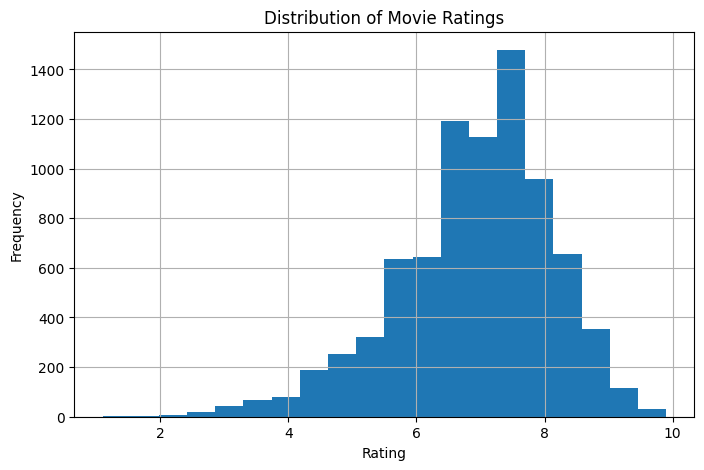

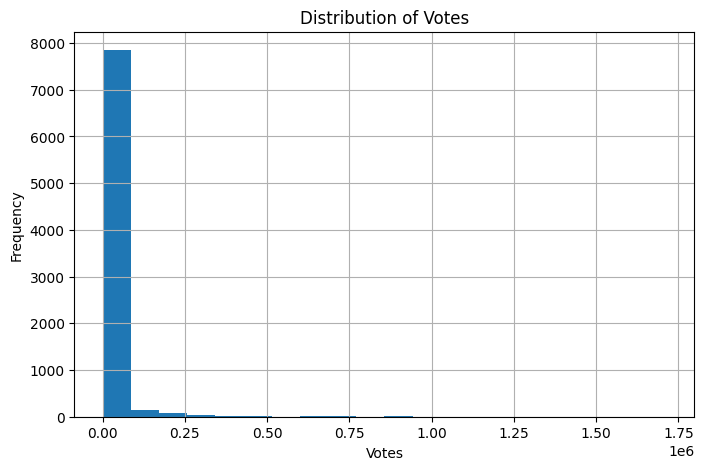

           rating     votes   runtime
rating   1.000000  0.103435 -0.223826
votes    0.103435  1.000000  0.143464
runtime -0.223826  0.143464  1.000000


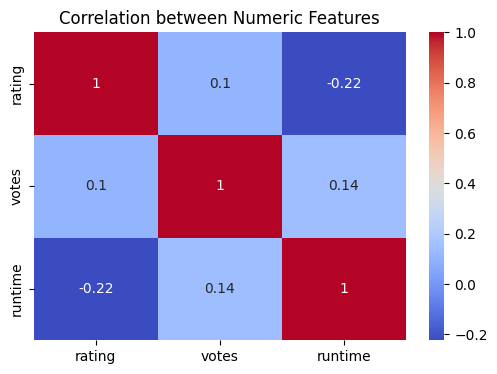

In [17]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of ratings
plt.figure(figsize=(8, 5))
movies['rating'].hist(bins=20)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of votes
plt.figure(figsize=(8, 5))
movies['votes'].hist(bins=20)
plt.title('Distribution of Votes')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.show()

# Check correlations among numeric variables
print(movies[['rating', 'votes', 'runtime']].corr())

# Plot a correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(movies[['rating', 'votes', 'runtime']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Numeric Features')
plt.show()


In [18]:
# Average rating by type
print(movies.groupby('type')['rating'].mean())

# Average votes by type
print(movies.groupby('type')['votes'].mean())

# Count of movies per type
print(movies['type'].value_counts())

type
movie     6.753815
series    7.767778
Name: rating, dtype: float64
type
movie     13876.379118
series    21435.493333
Name: votes, dtype: Float64
type
movie     8611
series    1388
Name: count, dtype: int64


start_year_only
1932.0       2
1933.0       1
1938.0       1
1941.0       1
1944.0       1
          ... 
2019.0    1339
2020.0    1609
2021.0    1089
2022.0     140
2023.0       2
Name: count, Length: 78, dtype: int64


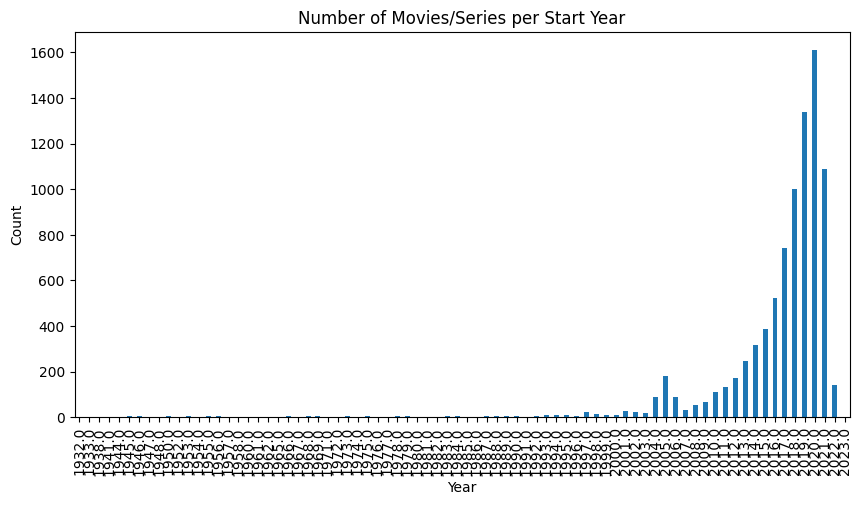

In [19]:
# Extract the year from the 'start_year' datetime
movies['start_year_only'] = movies['start_year'].dt.year

# Count movies per start year
start_year_counts = movies['start_year_only'].value_counts().sort_index()
print(start_year_counts)

# Plot movies per start year
plt.figure(figsize=(10, 5))
start_year_counts.plot(kind='bar')
plt.title('Number of Movies/Series per Start Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


In [20]:
# Average rating by the primary genre
print(movies.groupby('genre1')['rating'].mean().sort_values(ascending=False))

genre1
War            8.200000
Film-Noir      7.500000
Animation      7.380458
Music          7.364286
Crime          7.289201
Documentary    7.174714
Sport          6.960000
Biography      6.919084
Drama          6.860949
Talk-Show      6.850000
Short          6.822581
Comedy         6.740758
Romance        6.734375
Adventure      6.711888
Musical        6.700000
Action         6.695075
Reality-TV     6.575000
Western        6.560000
Family         6.472727
Game-Show      6.347826
History        6.200000
News           6.150000
Fantasy        6.028000
Mystery        5.731579
Sci-Fi         5.445455
Thriller       5.160976
Horror         5.044286
Name: rating, dtype: float64
